# Group 13: ML Project
### Newland: The City of the Future

#### Made by:
* Catarina Candeias (m20200656@novaims.unl.pt)
* Catarina Urbano (m20200607@novaims.unl.pt)
* Margarida Pereira (m20201038@novaims.unl.pt) 
* Rita Ferreira (m20200661@novaims.unl.pt)
* Tiago Gonçalves (m20201053@novaims.unl.pt) 

## Table of Contents

* [1. Imports](#1)
* [2. Loading Data](#2)
* [3. Train-Test Split](#3)
* [4. Exploratory Data Analysis](#4)
* [5. Feature Engineering](#5)
    * [5.1. Gender](#5.1)
    * [5.2. Birthday to Age](#5.2)
    * [5.3. Marital Status](#5.3)
    * [5.4. Native Continent](#5.4)    
    * [5.5. Lives with](#5.5)
    * [5.6. Base Area](#5.6)
    * [5.7. Years of Education](#5.7)    
    * [5.8. Employment Sector](#5.8)   
    * [5.9. Role](#5.9)      
    * [5.10. Working hours per week](#5.10)
    * [5.11. Money Received](#5.11)
    * [5.12. Ticket Price](#5.12)
* [6. Missing Values Imputation](#6)
* [7. One-Hot Encoding](#7)
* [8. Getting a Balanced Train data](#8)
* [9. Feature Selection](#9)
    * [9.1. Feature Selection - Metric Features](#9.1)
    * [9.2. Feature Selection - Categorical Features](#9.2)
    * [9.3. Feature Selection - All features (one-hot encoded categorical features)](#9.3)
* [10. Adjustment of the Validation and Test data sets](#10)
* [11. Models](#11)
    * [<font color='red'> 11.1. Final Model </font>](#11.1) 
    * [11.2. Testing other Models](#11.2)
        * [11.2.1. Models using only the selected Features](#11.2.1)
        * [11.2.2. Models using all the Features](#11.2.2)    
        * [11.2.3. Model with Balanced Data ](#11.2.3)    
        * [11.2.4. Classifiers Combination](#11.2.4)
            * [11.2.4.1. Stacking Classifier Combinations](#11.2.4.1)
            * [11.2.4.2. Voting Classifier Combinations](#11.2.4.2)
        * [11.2.5. Testing the best Combinations](#11.2.5)
            * [11.2.5.1. Model a)](#11.2.5.1)
            * [11.2.5.2. Model b)](#11.2.5.2)
            * [11.2.5.3. Model c)](#11.2.5.3)
            * [11.2.5.4. Model d)](#11.2.5.4)
            * [11.2.5.5. Model e)](#11.2.5.5)            
    
* [12. Submission](#12)        

# 1. Imports <a class="anchor" id="1"></a>

In [77]:
%autosave 60

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifierCV, LassoCV, RidgeCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import warnings
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, confusion_matrix
from scipy.spatial.distance import squareform, pdist
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import StackingClassifier

from itertools import combinations

Autosaving every 60 seconds


# 2. Loading Data <a class="anchor" id="2"></a>

In [78]:
dfRAW = pd.read_excel("Train.xlsx").set_index("CITIZEN_ID")
dfRAW.head()

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
CITIZEN_ID,,,,,,,,,,,,,,
12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


# 3.Train-Test Split <a class="anchor" id="3"></a>

In [79]:
data = dfRAW.iloc[:,:-1]
target = dfRAW.iloc[:,-1]

Train/Validation and Test:

In [80]:
X_train_val, X_test, y_train_val, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=target
                                                   )

Train and Validation:

In [81]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size = 0.25,
                                                  random_state = 15,
                                                  shuffle=True,
                                                  stratify=y_train_val
)

# 4. Exploratory Data Analysis <a class="anchor" id="4"></a>

In [82]:
df = X_train.copy()
df = pd.concat([df,y_train],axis=1)

Are there duplicated observations?

In [83]:
df.duplicated().sum()

0

Data types:

In [84]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13440 entries, 17935 to 23443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    13440 non-null  object
 1   Birthday                13440 non-null  object
 2   Native Continent        13440 non-null  object
 3   Marital Status          13440 non-null  object
 4   Lives with              13440 non-null  object
 5   Base Area               13440 non-null  object
 6   Education Level         13440 non-null  object
 7   Years of Education      13440 non-null  int64 
 8   Employment Sector       13440 non-null  object
 9   Role                    13440 non-null  object
 10  Working Hours per week  13440 non-null  int64 
 11  Money Received          13440 non-null  int64 
 12  Ticket Price            13440 non-null  int64 
 13  Income                  13440 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.5+ MB


Count of Missing Values:

In [85]:
df.replace('?', np.nan, inplace=True)

In [86]:
df.isna().sum()

Name                        0
Birthday                    0
Native Continent            0
Marital Status              0
Lives with                  0
Base Area                 225
Education Level             0
Years of Education          0
Employment Sector         757
Role                      758
Working Hours per week      0
Money Received              0
Ticket Price                0
Income                      0
dtype: int64

# 5. Feature Engineering <a class="anchor" id="5"></a>

In [87]:
#Auxiliary Function
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation=90)
    plt.show()

### 5.1. Gender <a class="anchor" id="5.1"></a>

Getting the citizen's gender from his/her name:

In [88]:
gender = df["Name"].str.split(' ',expand=True, n=1)[0]
gender = gender.map(lambda x: 1 if x=='Mr.' else 0) #1 for Male, 0 for Female
df.insert(2, "Gender", gender)

Does the gender of the citizen influence his/her income level?

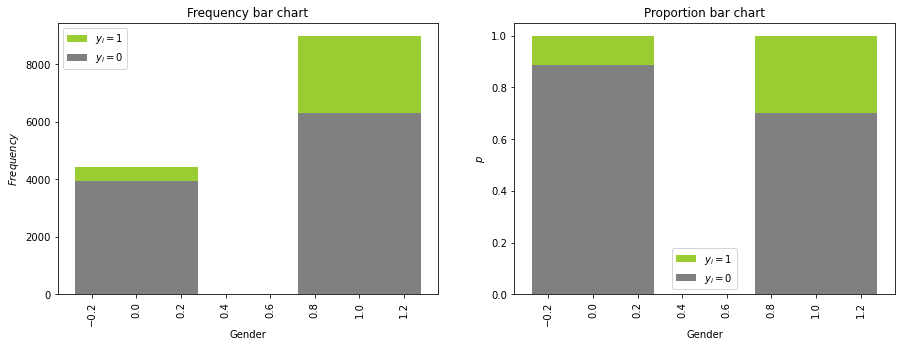

In [89]:
bar_charts_categorical(df,"Gender", 'Income')

### 5.2. Birthday to Age <a class="anchor" id="5.2"></a>

In [90]:
Age = 2048 - df["Birthday"].str.split(",",expand=True)[1].astype(int)
df.insert(3, "Age", Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

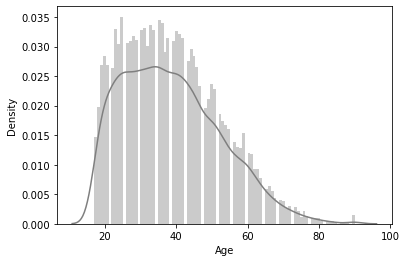

In [91]:
#Age distribution:
sns.distplot(df['Age'], color='tab:grey',bins=90)

<AxesSubplot:xlabel='Age'>

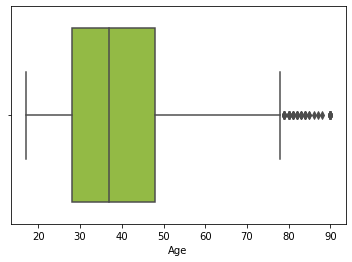

In [92]:
sns.boxplot(df["Age"], color = "yellowgreen")

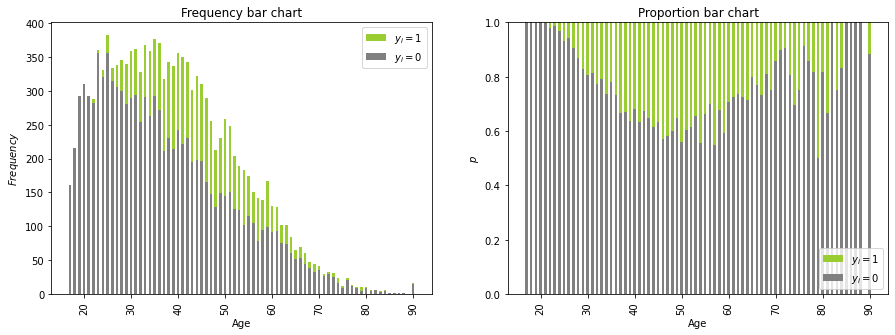

In [93]:
bar_charts_categorical(df,"Age","Income")

### 5.3. Marital Status <a class="anchor" id="5.3"></a>

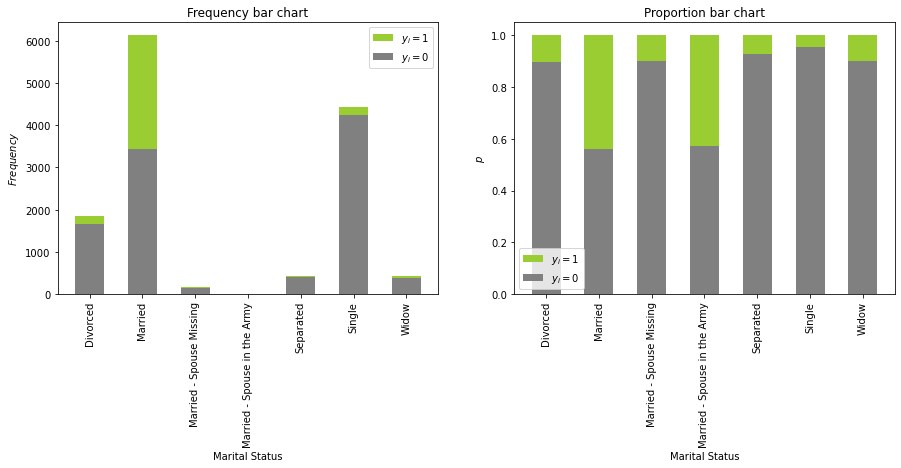

In [94]:
bar_charts_categorical(df,"Marital Status", "Income")

In [95]:
df["Marital Status"] = df["Marital Status"].map(lambda x: "Married_A" if (x=='Married') |(x=='Married - Spouse Missing') else 
                                               "Married_B" if (x=='Single') else 'Married_C')

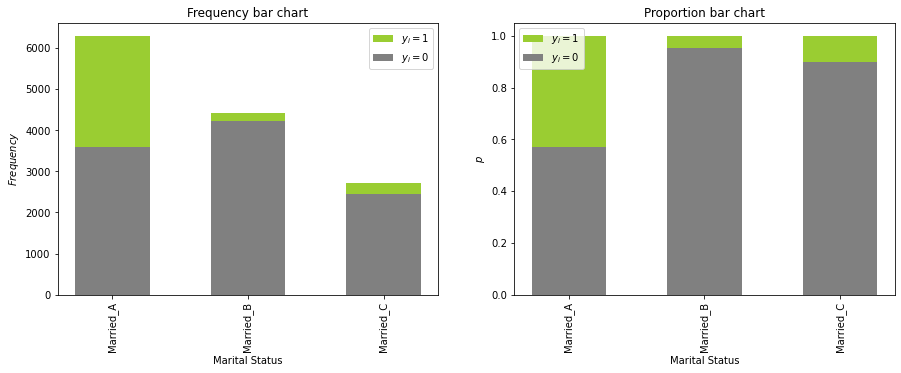

In [96]:
bar_charts_categorical(df,"Marital Status", "Income")

### 5.4. Native Continent <a class="anchor" id="5.4"></a>

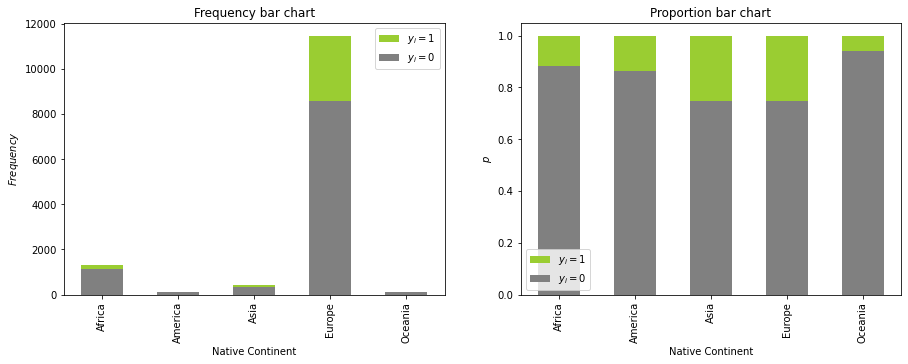

In [97]:
bar_charts_categorical(df,"Native Continent", "Income")

In [98]:
#Turning Native Continent into a binary variable: 1 if from Eurasia, 0 otherwise.
df["Native Continent"] = df["Native Continent"].map(lambda x: "1" if x=='Europe' or x=='Asia' else "0")

### 5.5. Lives with <a class="anchor" id="5.5"></a>

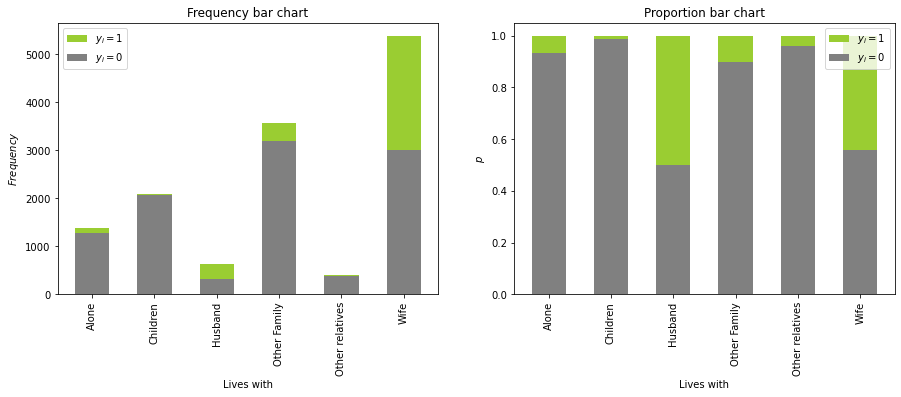

In [99]:
bar_charts_categorical(df,"Lives with", "Income")

In [100]:
#Group in 3 categories:
# A - Alone and Other Family
# B - Children and Other Relatives
# C - Husband and Wife

# Lives_Category = pd.Series(df["Lives with"].map(lambda x: 'A' if x=='Alone' or x=='Other Family' else "B" if x=='Children' or x== 'Other Relatives' 
#                                                           else "C"), name='Lives_category')

In [101]:
# df = df.drop('Lives with', axis=1)
# df.insert(8, 'Lives with', Lives_Category)

### 5.6. Base Area <a class="anchor" id="5.6"></a>

In [102]:
df['Base Area'].value_counts(dropna=False)

Northbury        12068
Fanfoss            270
NaN                225
Alverton            80
Butterpond          65
Auchenshuggle       50
Watford             46
Pran                43
Laewaes             42
Aroonshire          37
Fool's March        35
Eelry               33
Sharpton            33
Sharnwick           31
Cherrytown          31
Wigston             30
King's Watch        30
Bellmoral           26
Kirkwall            26
Lanercost           25
Aerilon             25
Knife's Edge        23
Laenteglos          20
Tranmere            15
Drumchapel          14
Lewes               12
Kald                11
MillerVille         11
Aberuthven          10
Orilon              10
Carlisle            10
Conriston            9
Willesden            8
Redwick Bush         8
Mensfield            7
Marnmouth            6
Woodpine             6
Middlesbrough        4
Bellenau             4
Ironforge            1
Name: Base Area, dtype: int64

In [103]:
# 90% of the train is 'Northbury' - we can delete this variable, since it does not add information:
df = df.drop("Base Area",axis=1)

### 5.7. Years of Education <a class="anchor" id="5.7"></a>

In [104]:
df.loc[:,["Education Level","Years of Education"]].groupby(by=["Years of Education", "Education Level"]).agg({"Years of Education":"count"}).rename(columns={"Years of Education":"Count of Individuals"})

Count of Individuals
Years of Education Education Level                                           
2                  Preschool                                               20
4                  Primary School                                          66
6                  Middle School - 1st Cycle                              143
8                  Middle School - 2nd Cycle                              267
9                  Middle School Complete                                 196
10                 High School - 1st Cycle                                387
11                 High School - 2nd Cycle                                480
12                 High School Complete                                   164
                   Professional School                                   4357
13                 High School + PostGraduation                          2977
                   Professional School + PostGraduation                   575
15                 Bachelors                                              460
16                 Bachelors + PostGraduation                            2210
17                 Masters                                                719
18                 Masters + PostGraduation                               245
21                 PhD                                                    174

We can check that the categorical variable Education Level is almost fully explained by the numerical variable Years of Education, therefore we're dropping the categorical variable Education Level.

In [105]:
df = df.drop("Education Level",axis=1)

### 5.8. Employment Sector  <a class="anchor" id="5.8"></a>

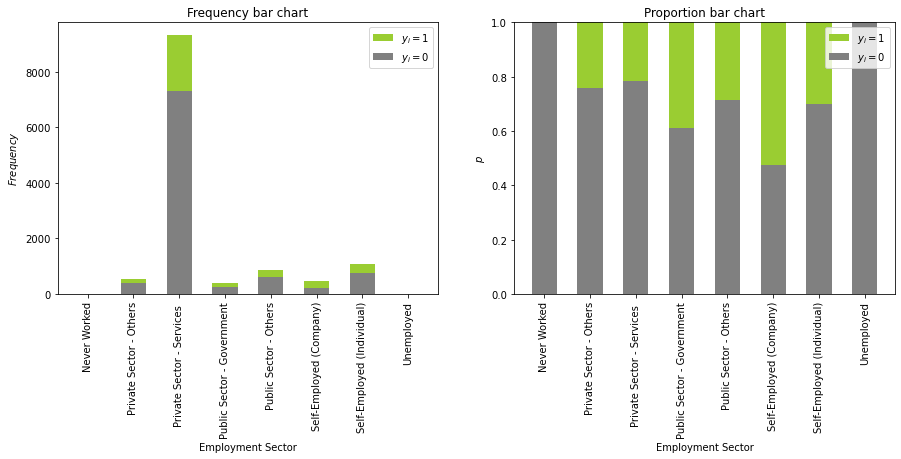

In [106]:
bar_charts_categorical(df,"Employment Sector", "Income")

In [107]:
#Changing the Role of people who Never worked from NaN to "Never Worked":
df["Role"] = df.apply(lambda x: "Never Worked" if x["Employment Sector"]=="Never Worked" else x["Role"], axis=1)

In [108]:
#Joining "Never Worked" and "Unemployed" into a single category: "No work"
#Joining "Private Sector - Others" and "Private Sector - Services" into a single category: "Private Sector"

In [109]:
df['Employment Sector'] = df['Employment Sector'].map(lambda x: "No work" if (x=="Never Worked") | (x=="Unemployed") else "Private Sector" if (x=="Private Sector - Others") | (x=="Private Sector - Services ") else x).rename("Employment_Sector")

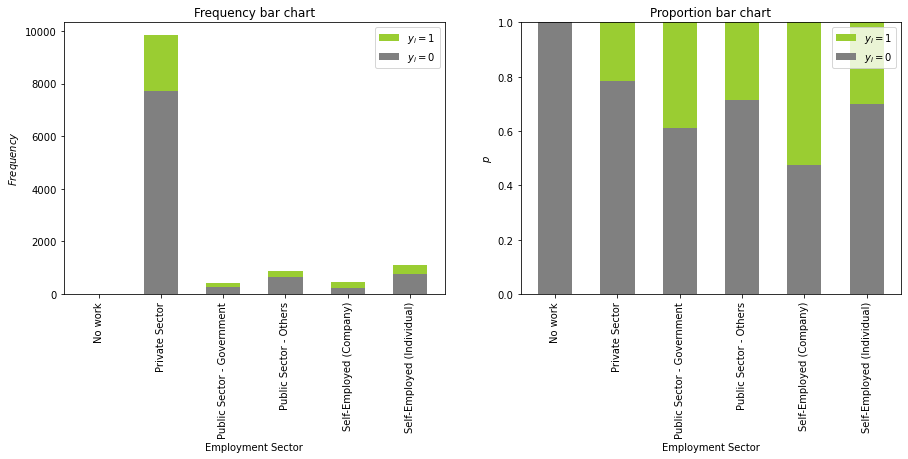

In [110]:
bar_charts_categorical(df,"Employment Sector", "Income")

### 5.9. Role <a class="anchor" id="5.9"></a>

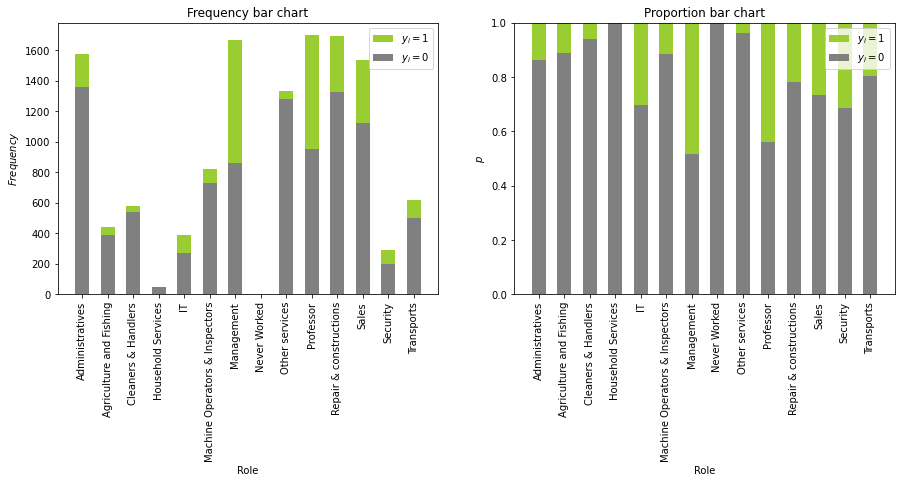

In [111]:
bar_charts_categorical(df,"Role", "Income")

In [112]:
#merging the Roles "Household Services" and "Never Worked" into "HS&NW"
df["Role"] = df["Role"].map(lambda x: "HS&NW" if (x=="Household Services") | (x=="Never Worked") else x)

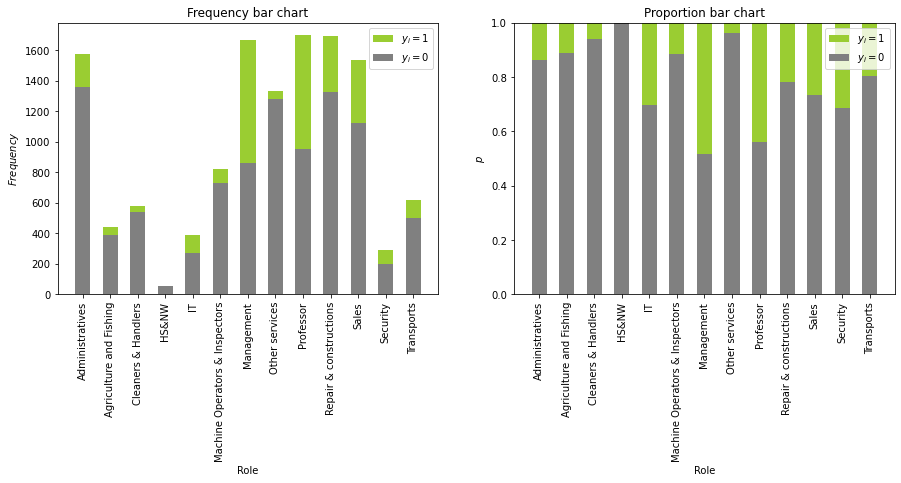

In [113]:
bar_charts_categorical(df,"Role", "Income")

### 5.10. Working hours per week <a class="anchor" id="5.10"></a>

<AxesSubplot:xlabel='Working Hours per week'>

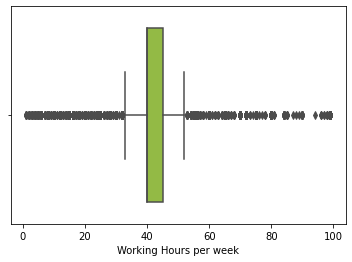

In [114]:
sns.boxplot(df["Working Hours per week"], color = "yellowgreen")

In [115]:
#we can see that some values are out of the ordinary
#So, we defined that an acceptable work limit would be 70 hours (10 hours daily, 7 days a week)
#All values above that, we assume as 70
#few hours we think it is acceptable, since they can work only in part-time

df['Working Hours per week'] = df['Working Hours per week'].map(lambda x: 70 if x > 70 else x)



### 5.11. Money Received <a class="anchor" id="5.11"></a>

<AxesSubplot:xlabel='Money Received'>

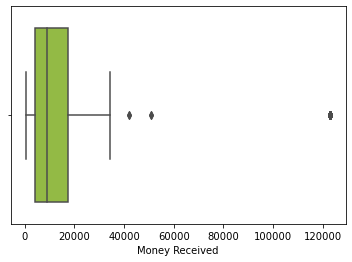

In [116]:
sns.boxplot(df[df["Money Received"]!=0]["Money Received"], color = "yellowgreen")

We can group in 4 categories: <br>
0 if didn't receive money<br>
C if 0 < Money Received =< 4196<br>
B if 4196 < Money Received <= 8977<br>
A if 8977 < Money Received 

In [117]:
Q1 = df[(df["Money Received"]!=0)]["Money Received"].quantile(0.25)
Median = df[(df["Money Received"]!=0)]["Money Received"].quantile(0.5)

money_category = pd.Series(df["Money Received"].map(lambda x: '0' if x==0 else "C" if 0<x<=Q1 
                                                          else "B" if Q1 < x <= Median else "A"), name='money_category')
print(Q1,Median)

4196.0 8977.0


In [118]:
df["Money_category"]=money_category

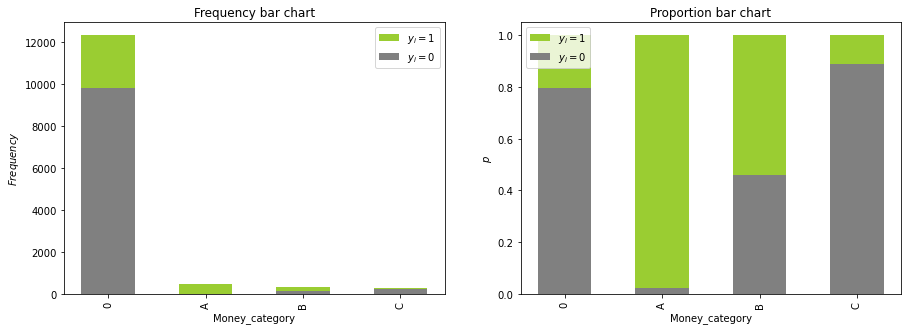

In [119]:
bar_charts_categorical(df,"Money_category", "Income")

### 5.12. Ticket Price <a class="anchor" id="5.12"></a>

<AxesSubplot:xlabel='Ticket Price'>

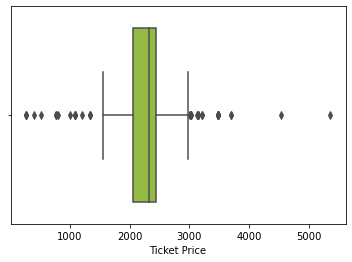

In [120]:
sns.boxplot(df[df["Ticket Price"]!=0]["Ticket Price"], color = "yellowgreen")

In [121]:
Q1 = df[(df["Ticket Price"]!=0)]["Ticket Price"].quantile(0.25)
Median = df[(df["Ticket Price"]!=0)]["Ticket Price"].quantile(0.5)
Q3 = df[(df["Ticket Price"]!=0)]["Ticket Price"].quantile(0.75)
print (Q1, Median, Q3)

2057.0 2321.0 2432.0


In [122]:
#Ticket Price Categories:
# 0 if didn't pay for a ticket
# D if 0 < Ticket Price <= 2114
# C if 2114 < Ticket Price <= 2321
# B if 2321 < Ticket Price <= 2432
# A if Ticket Price > 2432

ticketprice_category = pd.Series(df["Ticket Price"].map(lambda x: '0' if x==0 else "D" if 0<x<=2114 else "C" if 2114<x<=2321
                                                            else "B" if 2321<x<=2432 else "A"), name = "tp_category" )

In [123]:
df["Ticket_category"] = ticketprice_category

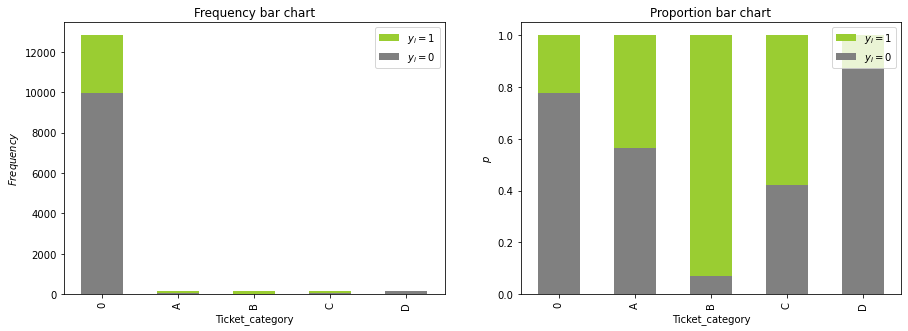

In [124]:
bar_charts_categorical(df,"Ticket_category", "Income")

In [125]:
df = df.drop(["Name","Birthday"],axis=1)

In [126]:
#Income as last column
df = df[[c for c in df if c not in ['Income']] 
       + ['Income']]

In [127]:
df.head()

,Gender,Age,Native Continent,Marital Status,Lives with,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Money_category,Ticket_category,Income
CITIZEN_ID,,,,,,,,,,,,,,
17935,0,20,1,Married_B,Other Family,13,Private Sector,Sales,40,0,0,0,0,0
21522,1,44,1,Married_A,Wife,12,Private Sector,Repair & constructions,41,0,0,0,0,0
21622,0,57,1,Married_C,Alone,13,Private Sector,Administratives,38,0,2777,0,A,1
26182,0,43,1,Married_B,Children,9,Self-Employed (Company),Sales,44,0,0,0,0,0
18681,0,38,1,Married_A,Husband,12,Private Sector,Management,60,0,0,0,0,1


# 6. Missing Values: Employment Sector and Role <a class="anchor" id="6"></a>

#### Imputing missing values for categorical data with KNN-Imputer

1) Normalizing Numerical Data:

In [128]:
df_scaled = df.copy()

In [129]:
metric_features = ["Age","Years of Education", "Working Hours per week","Money Received", "Ticket Price"]

In [130]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_scaled[metric_features])

In [131]:
df_scaled[metric_features] = scaled_feat

2) Getting our distance matrix:

In [132]:
df_scaled

,Gender,Age,Native Continent,Marital Status,Lives with,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Money_category,Ticket_category,Income
CITIZEN_ID,,,,,,,,,,,,,,
17935,0,-1.364025,1,Married_B,Other Family,-0.073183,Private Sector,Sales,-0.019771,-0.144598,-0.216172,0,0,0
21522,1,0.388025,1,Married_A,Wife,-0.471880,Private Sector,Repair & constructions,0.066030,-0.144598,-0.216172,0,0,0
21622,0,1.337052,1,Married_C,Alone,-0.073183,Private Sector,Administratives,-0.191373,-0.144598,5.414650,0,A,1
26182,0,0.315022,1,Married_B,Children,-1.667969,Self-Employed (Company),Sales,0.323433,-0.144598,-0.216172,0,0,0
18681,0,-0.049988,1,Married_A,Husband,-0.471880,Private Sector,Management,1.696249,-0.144598,-0.216172,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31774,1,0.242020,1,Married_A,Wife,1.920299,Self-Employed (Individual),Professor,-0.191373,-0.144598,-0.216172,0,0,1
32458,1,0.607031,1,Married_C,Other Family,-0.870576,Private Sector,Cleaners & Handlers,-0.019771,-0.144598,-0.216172,0,0,0
30525,1,0.534029,1,Married_A,Wife,-0.870576,Private Sector,Cleaners & Handlers,0.409234,-0.144598,-0.216172,0,0,1


In [133]:
distance_matrix = pd.DataFrame(squareform(pdist(df_scaled[metric_features])), columns=df_scaled.index, index=df_scaled.index)

In [134]:
distance_matrix

CITIZEN_ID,17935,21522,21622,26182,18681,12796,28302,21293,25164,19907,...,19093,17090,24944,15262,31100,31774,32458,30525,21388,23443
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
17935,0.000000,1.798888,6.247513,2.341011,2.197812,0.000000,5.316265,1.177942,1.654794,1.584040,...,2.016680,2.327655,1.521764,0.957318,1.998038,2.565697,2.126240,2.102972,4.343193,3.589011
21522,1.798888,0.000000,5.729924,1.225649,1.688037,1.798888,5.065000,0.806672,0.169349,0.235214,...,0.872121,1.380558,0.601678,1.782047,0.904068,2.410414,0.462909,0.545953,3.296979,3.675805
21622,6.247513,5.729924,0.000000,5.963143,6.111638,6.247513,1.980992,5.919886,5.752709,5.767050,...,5.790827,5.809829,5.797159,6.281211,5.885741,6.072827,5.736233,5.774735,6.688300,7.232343
26182,2.341011,1.225649,5.963143,0.000000,1.857010,2.341011,5.531295,1.367357,1.246494,1.252891,...,1.682167,2.033767,1.612038,2.011437,0.973111,3.625745,0.915911,0.831361,2.259028,2.676087
18681,2.197812,1.688037,6.111638,1.857010,0.000000,2.197812,5.110172,1.319726,1.740688,1.729939,...,1.075303,3.059297,1.355243,1.449304,1.010527,3.061194,1.880255,1.468483,3.996698,3.878398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31774,2.565697,2.410414,6.072827,3.625745,3.061194,2.565697,4.926912,2.534625,2.398326,2.399437,...,2.254337,2.655548,2.087108,2.985690,2.981584,0.000000,2.819870,2.869666,5.645090,5.831345
32458,2.126240,0.462909,5.736233,0.915911,1.880255,2.126240,5.216200,1.115194,0.540547,0.592295,...,1.180396,1.349332,1.039720,2.055713,0.954028,2.819870,0.000000,0.435172,2.857426,3.459358
30525,2.102972,0.545953,5.774735,0.831361,1.468483,2.102972,5.162487,0.962486,0.654426,0.690099,...,0.908411,1.761728,0.909775,1.847345,0.556839,2.869666,0.435172,0.000000,2.964170,3.443558


In [135]:
#Getting the IDs of the observations with missing values on "Employment Sector" and "Role":
idxnan = df_scaled[df_scaled[["Role","Employment Sector"]].isna().any(axis=1)].index

In [136]:
#Getting the distance matrix where the rows are the observations with missing values on "Employment Sector" and "Role"
dmatrix_mvalues = distance_matrix[idxnan].T

In [137]:
dmatrix_mvalues

CITIZEN_ID,17935,21522,21622,26182,18681,12796,28302,21293,25164,19907,...,19093,17090,24944,15262,31100,31774,32458,30525,21388,23443
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
31520,1.215974,2.127971,6.457021,1.969608,2.435320,1.215974,5.782206,1.536245,1.991645,1.924971,...,2.518925,2.602727,2.105677,1.226886,2.065602,3.678808,2.226058,2.196577,3.579573,2.396630
13880,2.177255,2.442424,6.317450,2.898514,3.845179,2.177255,5.939154,2.526488,2.298901,2.267390,...,3.195213,1.524140,2.667895,2.949934,3.123222,3.214060,2.514606,2.841995,4.020174,3.852979
27431,5.596171,4.381537,6.866216,4.353023,5.916417,5.596171,7.377304,5.055317,4.397098,4.438716,...,5.104611,3.351733,4.949014,5.919899,4.959201,5.621163,4.067313,4.454099,3.657808,5.521658
25090,2.488652,1.047063,5.735808,1.800011,1.392725,2.488652,4.910778,1.438645,1.195019,1.240962,...,0.511015,2.225297,0.975431,2.226058,1.099782,2.359450,1.226886,1.005851,3.812795,4.406298
15607,5.105098,4.084486,6.511680,4.886374,5.595195,5.105098,6.420878,4.764370,4.105753,4.149009,...,4.525425,3.111736,4.376796,5.636118,4.906201,3.738709,4.081961,4.433197,5.626788,6.936356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27124,5.009020,5.291205,2.770931,5.480054,5.315679,5.009020,2.237562,5.095146,5.253012,5.232173,...,5.306093,5.597803,5.179265,5.024862,5.302053,5.620127,5.415108,5.372853,6.630985,6.162949
21832,2.725192,1.881157,5.867918,2.641136,3.547211,2.725192,5.531499,2.441144,1.834345,1.856006,...,2.590541,0.625274,2.243392,3.266443,2.750156,2.573001,1.897861,2.298898,3.823264,4.540569
18699,1.674658,2.349788,6.251026,3.414009,2.750190,1.674658,5.031131,2.102178,2.274437,2.240204,...,2.237458,2.748501,1.904741,2.200769,2.774626,1.177922,2.802542,2.798293,5.536308,5.215853


In [138]:
#Excluding from columns observations with missing values:
notnanid = [i for i in dmatrix_mvalues.columns.to_list() if i not in dmatrix_mvalues.index.to_list()]
dmatrix_mvalues = dmatrix_mvalues[notnanid]
dmatrix_mvalues

CITIZEN_ID,17935,21522,21622,26182,18681,12796,28302,21293,25164,19907,...,19093,17090,24944,15262,31100,31774,32458,30525,21388,23443
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
31520,1.215974,2.127971,6.457021,1.969608,2.435320,1.215974,5.782206,1.536245,1.991645,1.924971,...,2.518925,2.602727,2.105677,1.226886,2.065602,3.678808,2.226058,2.196577,3.579573,2.396630
13880,2.177255,2.442424,6.317450,2.898514,3.845179,2.177255,5.939154,2.526488,2.298901,2.267390,...,3.195213,1.524140,2.667895,2.949934,3.123222,3.214060,2.514606,2.841995,4.020174,3.852979
27431,5.596171,4.381537,6.866216,4.353023,5.916417,5.596171,7.377304,5.055317,4.397098,4.438716,...,5.104611,3.351733,4.949014,5.919899,4.959201,5.621163,4.067313,4.454099,3.657808,5.521658
25090,2.488652,1.047063,5.735808,1.800011,1.392725,2.488652,4.910778,1.438645,1.195019,1.240962,...,0.511015,2.225297,0.975431,2.226058,1.099782,2.359450,1.226886,1.005851,3.812795,4.406298
15607,5.105098,4.084486,6.511680,4.886374,5.595195,5.105098,6.420878,4.764370,4.105753,4.149009,...,4.525425,3.111736,4.376796,5.636118,4.906201,3.738709,4.081961,4.433197,5.626788,6.936356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27124,5.009020,5.291205,2.770931,5.480054,5.315679,5.009020,2.237562,5.095146,5.253012,5.232173,...,5.306093,5.597803,5.179265,5.024862,5.302053,5.620127,5.415108,5.372853,6.630985,6.162949
21832,2.725192,1.881157,5.867918,2.641136,3.547211,2.725192,5.531499,2.441144,1.834345,1.856006,...,2.590541,0.625274,2.243392,3.266443,2.750156,2.573001,1.897861,2.298898,3.823264,4.540569
18699,1.674658,2.349788,6.251026,3.414009,2.750190,1.674658,5.031131,2.102178,2.274437,2.240204,...,2.237458,2.748501,1.904741,2.200769,2.774626,1.177922,2.802542,2.798293,5.536308,5.215853


Replacing the missing values with the most frequent category of the 5-NN:

In [139]:
#Getting the 5 Nearest Neighbours of the observations with missing values:
NN = pd.Series( data = [dmatrix_mvalues.iloc[i,:].sort_values().head(5).index.to_list() for i in range(len(dmatrix_mvalues))], index=dmatrix_mvalues.index)
NN

CITIZEN_ID
31520    [28599, 21196, 30313, 24229, 25384]
13880    [25512, 16067, 23802, 22659, 20477]
27431    [17158, 23194, 28659, 16446, 12950]
25090    [18235, 27784, 20995, 33394, 34742]
15607    [26504, 30639, 16291, 26022, 16121]
                        ...                 
27124    [22761, 25269, 32106, 26468, 23977]
21832    [14524, 25442, 23225, 24422, 19984]
18699    [29964, 20491, 21983, 12847, 27315]
29724    [33647, 31724, 32438, 17477, 24670]
24657    [20848, 16373, 34603, 18808, 28326]
Length: 757, dtype: object

In [140]:
#Getting the most frequent "Employment Sector" and "Role" of the 5 Nearest Neighbours of each point with missing values:
df_scaled_T = df_scaled.T.copy()
imputed_employment = pd.Series([df_scaled_T[NN[i]].T["Employment Sector"].mode()[0] for i in NN.index], index=NN.index)
imputed_role = pd.Series([df_scaled_T[NN[i]].T["Role"].mode()[0] for i in NN.index], index=NN.index)

In [141]:
#Just to make things easier:
df_scaled.replace(np.nan, '?', inplace=True)

In [142]:
#Replacing NaNs with the imputed categories
df_scaled["Employment Sector"] = df_scaled.apply(lambda x: imputed_employment[x.name] if x["Employment Sector"]=="?" else x["Employment Sector"], axis=1)
df_scaled["Role"] = df_scaled.apply(lambda x: imputed_role[x.name] if x["Role"]=="?" else x["Role"], axis=1)

In [143]:
df_scaled

,Gender,Age,Native Continent,Marital Status,Lives with,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Money_category,Ticket_category,Income
CITIZEN_ID,,,,,,,,,,,,,,
17935,0,-1.364025,1,Married_B,Other Family,-0.073183,Private Sector,Sales,-0.019771,-0.144598,-0.216172,0,0,0
21522,1,0.388025,1,Married_A,Wife,-0.471880,Private Sector,Repair & constructions,0.066030,-0.144598,-0.216172,0,0,0
21622,0,1.337052,1,Married_C,Alone,-0.073183,Private Sector,Administratives,-0.191373,-0.144598,5.414650,0,A,1
26182,0,0.315022,1,Married_B,Children,-1.667969,Self-Employed (Company),Sales,0.323433,-0.144598,-0.216172,0,0,0
18681,0,-0.049988,1,Married_A,Husband,-0.471880,Private Sector,Management,1.696249,-0.144598,-0.216172,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31774,1,0.242020,1,Married_A,Wife,1.920299,Self-Employed (Individual),Professor,-0.191373,-0.144598,-0.216172,0,0,1
32458,1,0.607031,1,Married_C,Other Family,-0.870576,Private Sector,Cleaners & Handlers,-0.019771,-0.144598,-0.216172,0,0,0
30525,1,0.534029,1,Married_A,Wife,-0.870576,Private Sector,Cleaners & Handlers,0.409234,-0.144598,-0.216172,0,0,1


# 7. One-Hot Encoding <a class="anchor" id="7"></a>

In [144]:
df_ohc = df_scaled.copy()

In [145]:
df_ohc.head()

,Gender,Age,Native Continent,Marital Status,Lives with,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Money_category,Ticket_category,Income
CITIZEN_ID,,,,,,,,,,,,,,
17935,0,-1.364025,1,Married_B,Other Family,-0.073183,Private Sector,Sales,-0.019771,-0.144598,-0.216172,0,0,0
21522,1,0.388025,1,Married_A,Wife,-0.471880,Private Sector,Repair & constructions,0.066030,-0.144598,-0.216172,0,0,0
21622,0,1.337052,1,Married_C,Alone,-0.073183,Private Sector,Administratives,-0.191373,-0.144598,5.414650,0,A,1
26182,0,0.315022,1,Married_B,Children,-1.667969,Self-Employed (Company),Sales,0.323433,-0.144598,-0.216172,0,0,0
18681,0,-0.049988,1,Married_A,Husband,-0.471880,Private Sector,Management,1.696249,-0.144598,-0.216172,0,0,1


In [146]:
#Excluded Gender, Native Continent and Married_binary because they're already binary
non_metric_features = ["Marital Status","Lives with", "Employment Sector", "Role", "Money_category","Ticket_category"]

In [147]:
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  
ohc_df

,x0_Married_B,x0_Married_C,x1_Children,x1_Husband,x1_Other Family,x1_Other relatives,x1_Wife,x2_Private Sector,x2_Public Sector - Government,x2_Public Sector - Others,...,x3_Sales,x3_Security,x3_Transports,x4_A,x4_B,x4_C,x5_A,x5_B,x5_C,x5_D
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
17935,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21522,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21622,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26182,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18681,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31774,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32458,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30525,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
# Reassigning df to contain ohc variables
df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
df_ohc = pd.concat([df_ohc.drop("Income",axis=1), df_ohc["Income"]],axis=1) #Income in last position
df_ohc.head()

,Gender,Age,Native Continent,Years of Education,Working Hours per week,Money Received,Ticket Price,x0_Married_B,x0_Married_C,x1_Children,...,x3_Security,x3_Transports,x4_A,x4_B,x4_C,x5_A,x5_B,x5_C,x5_D,Income
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
17935,0,-1.364025,1,-0.073183,-0.019771,-0.144598,-0.216172,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21522,1,0.388025,1,-0.471880,0.066030,-0.144598,-0.216172,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21622,0,1.337052,1,-0.073183,-0.191373,-0.144598,5.414650,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
26182,0,0.315022,1,-1.667969,0.323433,-0.144598,-0.216172,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18681,0,-0.049988,1,-0.471880,1.696249,-0.144598,-0.216172,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [149]:
X_train = df_ohc.iloc[:,:-1].copy()
y_train = df_ohc.iloc[:,-1].copy()

In [152]:
y_train.value_counts()

0    10253
1     3187
Name: Income, dtype: int64

# 8. Getting a Balanced Train data <a class="anchor" id="8"></a>

* #### Although in our final model we decided to train our model in the originally unbalanced data set because of its better performance, we will use this X_train_balanced and y_train_balanced to compare the results

In [ ]:
import imblearn
print(imblearn.__version__)
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

from collections import Counter

In [ ]:
sm = SVMSMOTE(sampling_strategy='auto')
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_balanced))

# 9. Feature Selection <a class="anchor" id="9"></a>

### 9.1. Feature Selection - Metric Features <a class="anchor" id="9.1"></a>

In [ ]:
metric_features = ["Age","Years of Education","Working Hours per week","Money Received", "Ticket Price"]

In [ ]:
data = df_scaled[metric_features]
target = df_scaled["Income"]

In [ ]:
#no of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    
    X_train1, X_test1, y_train1, y_test1 = train_test_split(data,target, test_size = 0.3, random_state = 0, stratify = target)
    
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train1,y_train1)
    X_test_rfe = rfe.transform(X_test1)
    model.fit(X_train_rfe,y_train1)
    y_pred = model.predict(X_test_rfe)
    
    score = f1_score(y_test1, y_pred, average='micro')
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

### 9.2. Feature Selection - Categorical Features <a class="anchor" id="9.2"></a>

In [ ]:
categorical_features_income = ["Gender","Native Continent","Marital Status","Lives with", "Employment Sector", "Role", "Money_category","Ticket_category","Income"]
categorical_features = ["Gender","Native Continent","Marital Status","Lives with", "Employment Sector", "Role", "Money_category","Ticket_category"]

In [ ]:
df_cffs=df_scaled[categorical_features_income].astype(object).copy()
df_cffs

In [ ]:
chi2_check = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df_cffs['Income'], df_cffs[feature]))[1] < 0.05:
        chi2_check.append('Important Feature')
    else:
        chi2_check.append('Not an Important Feature')
res = pd.DataFrame(data = [categorical_features, chi2_check] 
             ).T 
res.columns = ['Column', 'Feature Importance']
res

Checking which categories are important:

In [ ]:
check = {}
for i in res[res['Feature Importance'] == 'Important Feature']['Column']:
    dummies = pd.get_dummies(df_cffs[i])
    bon_p_value = 0.05/df_cffs[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(df_cffs['Income'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Keep Feature'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis - Not Important'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

### 9.3. Feature Selection - All features (one-hot encoded categorical features) <a class="anchor" id="9.3"></a>

In [ ]:
X_train = df_ohc.iloc[:,:-1].copy()
y_train = df_ohc.iloc[:,-1].copy()

In [ ]:
sel1 = SelectFromModel(RandomForestClassifier(n_estimators = 300),threshold = 0.01)
sel2 = SelectFromModel(GradientBoostingClassifier(n_estimators=300), threshold = 0.01)
sel1.fit(X_train,y_train)
sel2.fit(X_train,y_train)

In [ ]:
selected_feat_RFC= X_train.columns[(sel1.get_support())]
selected_feat_GBC= X_train.columns[(sel2.get_support())]

In [ ]:
print("Selected features with RFC and threshold = 0.01: \n")
for i in selected_feat_RFC: print(i,";",sep='', end=' ')

In [ ]:
print("Selected features with GBC and threshold = 0.01: \n")
for i in selected_feat_GBC: print(i,";",sep='', end=' ')

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
selected_features = ["Age","Years of Education","Working Hours per week","Money Received","Ticket Price","Gender",
                     "Native Continent","x0_Married_B","x0_Married_C","x1_Husband","x1_Wife","x1_Other Family",
                     "x2_Private Sector","x2_Self-Employed (Individual)","x3_Professor","x3_Management","x3_Other services","x4_A"]

In [ ]:
X_train[selected_features]

In [ ]:
clf = RandomForestClassifier(n_estimators = 300)

clf.fit(X_train, y_train)

# Checking the attribute gini importance
gini_importance = clf.feature_importances_
zippy = pd.DataFrame(gini_importance, columns =['gini'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)


# Plotting
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(data))
plt.figure(figsize=(15,10))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy, palette=np.array(pal[::-10]))
plt.axvline(x=0.01, color='green', linestyle=(0,(5,5)))

In [ ]:
clf = GradientBoostingClassifier(n_estimators = 300)

clf.fit(X_train, y_train)

# Checking the attribute gini importance
gini_importance = clf.feature_importances_
zippy = pd.DataFrame(gini_importance, columns =['gini'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

# Plotting
plt.figure(figsize=(15,10))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy, palette=np.array(pal[::-10]))
plt.axvline(x=0.01, color='green', linestyle=(0,(5,5)))

# 10. Adjustment of the Validation and Test data sets <a class="anchor" id="10"></a>
Applying the changes made on the train data set to the validation and test data sets

#### Variables that our train data set contains:

In [ ]:
X_train.columns

#### Some functions to adjust our dataframes:

In [ ]:
def change_df(dff):
    
    dataframe=dff.copy()
    
    dataframe.replace('?', np.nan, inplace=True)
    
    #Gender:
    gender = dataframe["Name"].str.split(' ',expand=True, n=1)[0]
    gender = gender.map(lambda x: 1 if x=='Mr.' else 0) #1 for Male, 0 for Female
    dataframe.insert(2, "Gender", gender)
    
    #Age:
    Age = 2048 - dataframe["Birthday"].str.split(",",expand=True)[1].astype(int)
    dataframe.insert(3, "Age", Age)
    
    #Marital Binary
    dataframe["Marital Status"] = dataframe["Marital Status"].map(lambda x: "Married_A" if (x=='Married') |(x=='Married - Spouse Missing') else 
                                               "Married_B" if (x=='Single') else 'Married_C')
    
    #Native Continent
    dataframe["Native Continent"] = dataframe["Native Continent"].map(lambda x: "1" if x=='Europe' or x=='Asia' else "0")
    
    #Base Area
    dataframe = dataframe.drop('Base Area',axis=1)
    
    #Education Level
    dataframe = dataframe.drop("Education Level",axis=1)
   
    #Role and Education Level
    dataframe["Role"] = dataframe.apply(lambda x: "Never Worked" if x["Employment Sector"]=="Never Worked" else x["Role"], axis=1)
    dataframe["Employment Sector"] = dataframe['Employment Sector'].map(lambda x: "No work" if (x=="Never Worked") | (x=="Unemployed") else "Private Sector" if (x=="Private Sector - Others") | (x=="Private Sector - Services ") else x).rename("Employment_Sector")
    dataframe["Role"] = dataframe["Role"].map(lambda x: "HS&NW" if (x=="Household Services") | (x=="Never Worked") else x)
    
    #Working hours per week
    dataframe['Working Hours per week'] = dataframe['Working Hours per week'].map(lambda x: 70 if x > 70 else x)
    
    #Money received and Ticket Price
    money_category = pd.Series(dataframe["Money Received"].map(lambda x: '0' if x==0 else "C" if 0<x<=4196 
                                                          else "B" if 4196 < x <= 8977 else "A"), name='money_category')
    dataframe["Money_category"]=money_category
    
    ticketprice_category = pd.Series(dataframe["Ticket Price"].map(lambda x: '0' if x==0 else "D" if 0<x<=2114 else "C" if 2114<x<=2321
                                                            else "B" if 2321<x<=2432 else "A"), name = "tp_category" )
    dataframe["Ticket_category"]=ticketprice_category
    
    dataframe = dataframe.drop(["Name","Birthday"],axis=1)
    
    return dataframe

In [ ]:
def scale(df):
    
    df_scaled = df.copy()
    metric_features = ["Age","Years of Education", "Working Hours per week","Money Received","Ticket Price"]
    scaled_feat = scaler.transform(df_scaled[metric_features])
    df_scaled[metric_features] = scaled_feat
    
    return df_scaled

In [ ]:
def CategoricalKNNImputer(dataframe):
    
    df_imputed = dataframe.copy()
    
    metric_features = ["Age","Years of Education", "Working Hours per week","Money Received","Ticket Price"]
    distance_matrix = pd.DataFrame(squareform(pdist(df_imputed[metric_features])), columns=df_imputed.index, index=df_imputed.index)
    idxnan = df_imputed[df_imputed[["Role","Employment Sector"]].isna().any(axis=1)].index
    dmatrix_mvalues = distance_matrix[idxnan].T
    notnanid = [i for i in dmatrix_mvalues.columns.to_list() if i not in dmatrix_mvalues.index.to_list()]
    dmatrix_mvalues = dmatrix_mvalues[notnanid]
    NN = pd.Series( data = [dmatrix_mvalues.iloc[i,:].sort_values().head(5).index.to_list() for i in range(len(dmatrix_mvalues))], index=dmatrix_mvalues.index)
    
    df_imputed_T = df_imputed.T.copy()
    imputed_employment = pd.Series([df_imputed_T[NN[i]].T["Employment Sector"].mode()[0] for i in NN.index], index=NN.index)
    imputed_role = pd.Series([df_imputed_T[NN[i]].T["Role"].mode()[0] for i in NN.index], index=NN.index)
    
    df_imputed.replace(np.nan, '?', inplace=True)
    
    df_imputed["Employment Sector"] = df_imputed.apply(lambda x: imputed_employment[x.name] if x["Employment Sector"]=="?" else x["Employment Sector"], axis=1)
    df_imputed["Role"] = df_imputed.apply(lambda x: imputed_role[x.name] if x["Role"]=="?" else x["Role"], axis=1)
    
    return df_imputed

In [ ]:
# OHE
def ohe(df):
    df_ohc = df.copy()
    non_metric_features = ["Marital Status","Lives with", "Employment Sector", "Role", "Money_category","Ticket_category"]
    ohc = OneHotEncoder(sparse=False, drop="first")
    ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
    ohc_feat_names = ohc.get_feature_names()
    ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
    df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
    return df_ohc

Performing the changes on X_val:

In [ ]:
X_val_backup = X_val.copy()

In [ ]:
X_val = change_df(X_val)
X_val = scale(X_val)
X_val = CategoricalKNNImputer(X_val)
X_val = ohe(X_val)

In [ ]:
X_val = X_val.drop("x3_Army",axis=1)

In [ ]:
X_val

Performing the changes on X_test

In [ ]:
X_test=change_df(X_test)
X_test=scale(X_test)
X_test=CategoricalKNNImputer(X_test)
X_test=ohe(X_test)
X_test.drop(columns=['x3_Army'], inplace=True)
X_test.head()

# 11. Models <a class="anchor" id="11"></a>

Scoring Function

In [ ]:
def score(y_val,y_pred):
    print('Micro f1 score:', f1_score(y_val, y_pred, average='micro'))
    print('\nResults on the data set:')
    print(classification_report(y_true = y_val, y_pred = y_pred))

## <font color='red'> 11.1. Final Model <a class="anchor" id="11.1"></a>

#### StackingClassifier 

Score on Kaggle: 0.86963

In [ ]:
# Classifiers used as estimators:
clf1 = GradientBoostingClassifier(max_depth=3,min_samples_leaf=10,n_estimators=300,subsample=0.8,random_state=10)
clf2 = GradientBoostingClassifier(random_state = 0, n_estimators = 310)
clf3 = HistGradientBoostingClassifier(random_state=0)

estimators = [('clf1', clf1),('clf2', clf2),('clf3', clf3)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1)

print('-----Performance on the Train and Validation data sets-------')
print('3-fold cross validation:\n')
for cl, label in zip([clf1, clf2, clf3, clf], 
                      ['clf1 - GradientBoostingClassifier', 
                       'clf2 - GradientBoostingClassifier', 
                       'clf3 - HistGradientBoostingClassifier',
                       'StackingClassifier with the classifiers above']):

    scores = model_selection.cross_val_score(cl, X_train, y_train, 
                                              cv=3, scoring='f1_micro')
    print("Score on train: %0.5f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

#score on the validation
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

y_pred = clf.predict(X_test)
print('\n\n-----Performance on the Test data set-------')
score(y_test,y_pred)

##  11.2. Testing other Models <a class="anchor" id="11.2"></a>

In [ ]:
# # Randomized Search on GradientBoostingClassifier
# param_dist = {'n_estimators':sp_randint(200,350),'min_samples_leaf':sp_randint(1,13),'max_depth':range(2,8,1),
#  'learning_rate' : [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],'min_samples_split':sp_randint(2,20),'subsample':[0.7,0.8,0.9,1]}
# pre_gs_inst = RandomizedSearchCV(GradientBoostingClassifier(),param_distributions = param_dist,cv=3,n_iter = 200, n_jobs=-1,
#                                  scoring='f1_micro')

# pre_gs_inst.fit(X_train, y_train)

# pre_gs_inst.best_params_

# # Grid search on GradientBoostingClassifier
# param_test1 = {'n_estimators':range(100,310,10),'max_depth':range(2,8,1),'min_samples_split':range(2,20,2), 
#                'max_features':['sqrt', 'log2'],'min_samples_leaf':range(1,10,1), 'subsample':[0.5,0.6,0.7,0.8,0.9]}
# gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=10), param_grid = param_test1, 
#                         scoring='f1_micro',n_jobs=4,iid=False, cv=5)
# gsearch1.fit(X_train, y_train)

# # RandomizedSearchCV on AdaBoostClassifier
# param_dist = {
#  'n_estimators': sp_randint(175, 240),'learning_rate' : [0.01,0.05,0.1,0.3,0.5,0.7,1,1.1,1.2,1.3,1.4,1.5,1.6]}

# pre_gs_inst = RandomizedSearchCV(AdaBoostClassifier(),param_distributions = param_dist,cv=5,n_iter = 200,n_jobs=-1,
#                                  scoring='f1_micro')
# pre_gs_inst.fit(X_train, y_train)
# pre_gs_inst.best_params_

# # Grid search on AdaBoostClassifier
# param_test2 = {'n_estimators':range(100,310,10),  'learning_rate' : [1.1,1.2,1.3,1.4,1.5,1.6]}
# gsearch2 = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = param_test2, scoring='f1_micro',n_jobs=4,iid=False, cv=5)
# gsearch2.fit(X_train, y_train)

# # RandomizedSearchCV on HistGradientBoostingClassifier
# param_dist = {'min_samples_leaf':sp_randint(1,6),'max_depth':range(2,8,1),
#               'learning_rate' : [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],'max_iter':sp_randint(80,120)}

# pre_gs_inst = RandomizedSearchCV(HistGradientBoostingClassifier(),param_distributions = param_dist,cv=5,
#  n_iter = 200,n_jobs=-1,scoring='f1_micro')
# pre_gs_inst.fit(X_train, y_train)
# pre_gs_inst.best_params_

### 11.2.1. Models using only the selected Features <a class="anchor" id="11.2.1"></a>

#### Model 1

In [ ]:
clf = GradientBoostingClassifier(max_depth=3,min_samples_leaf=10,n_estimators=300,subsample=0.8,random_state=10)

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train[selected_features], y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train[selected_features], y_train)
y_pred = clf.predict(X_val[selected_features])
score(y_val,y_pred)

#### Model 2

In [ ]:
clf =HistGradientBoostingClassifier(random_state=0)

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train[selected_features], y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train[selected_features], y_train)
y_pred = clf.predict(X_val[selected_features])
score(y_val,y_pred)


#### Model 3

In [ ]:
clf = AdaBoostClassifier(learning_rate= 1.5, n_estimators= 210, random_state=0)

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train[selected_features], y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train[selected_features], y_train)
y_pred = clf.predict(X_val[selected_features])
score(y_val,y_pred)

#### Model 4

In [ ]:
clf = SVC(C=3)

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train[selected_features], y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train[selected_features], y_train)
y_pred = clf.predict(X_val[selected_features])
score(y_val,y_pred)

#### Model 5

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(20,10), activation='logistic',learning_rate='adaptive', random_state=3, max_iter=600)

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train[selected_features], y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train[selected_features], y_train)
y_pred = clf.predict(X_val[selected_features])
score(y_val,y_pred)

#### Model 6

In [ ]:
clf = LogisticRegression()

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train[selected_features], y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train[selected_features], y_train)
y_pred = clf.predict(X_val[selected_features])
score(y_val,y_pred)

#### Model 7

In [ ]:
clf = GaussianNB()

print('-------MODEL WITH THE SELECTED FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train[selected_features], y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train[selected_features], y_train)
y_pred = clf.predict(X_val[selected_features])
score(y_val,y_pred)

### 11.2.2. Models using all the Features <a class="anchor" id="11.2.2"></a>

#### Model 1

In [ ]:
clf = GradientBoostingClassifier(max_depth=3,min_samples_leaf=10,n_estimators=300,subsample=0.8,random_state=10)

print('-------MODEL WITH ALL THE FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

#### Model 2

In [ ]:
clf =HistGradientBoostingClassifier(random_state=0)

print('-------MODEL WITH ALL THE FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

#### Model 3

In [ ]:
clf = AdaBoostClassifier(learning_rate= 1.5, n_estimators= 210, random_state=0)

print('-------MODEL WITH ALL THE FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

#### Model 4

In [ ]:
clf = SVC(C=3)

print('-------MODEL WITH ALL THE FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

#### Model 5

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(20,10), activation='logistic',learning_rate='adaptive', random_state=3, max_iter=600)

print('-------MODEL WITH ALL THE FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

#### Model 6

In [ ]:
clf = LogisticRegression()

print('-------MODEL WITH ALL THE FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

#### Model 7

In [ ]:
clf = GaussianNB()

print('-------MODEL WITH ALL THE FEATURES-------')
scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
print("Score on train: %0.5f (+/- %0.2f)" % (scores.mean(), scores.std()))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

### 11.2.3. Model with Balanced Data <a class="anchor" id="11.2.3"></a>

In [ ]:
clf=GradientBoostingClassifier(random_state = 0, n_estimators = 1200)
clf.fit(X_train_balanced,y_train_balanced)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

### 11.2.4. Classifiers Combination <a class="anchor" id="11.2.4"></a>
##### Method that takes our best Classifiers so far and combines them in order to find the best Stacking Classifier and Voting Classifier Models 

The classifiers used are the following:

In [ ]:
clf1 = GradientBoostingClassifier(max_depth=3,min_samples_leaf=10,n_estimators=300,subsample=0.8,random_state=10)
clf2 = GradientBoostingClassifier(random_state = 0, n_estimators = 310)
clf3 = HistGradientBoostingClassifier(random_state=0)
clf4 = AdaBoostClassifier( learning_rate= 1.5, n_estimators= 210,random_state=0)
clf5 = HistGradientBoostingClassifier(random_state=0,l2_regularization= 0, learning_rate= 0.3, max_depth=7 , 
                                    max_iter= 40,min_samples_leaf=20,max_leaf_nodes=31,validation_fraction=0.1,warm_start=True)
clf6 = GradientBoostingClassifier(min_samples_split=10,max_depth=3,min_samples_leaf=1,n_estimators=300,subsample=0.8,random_state=10)
clf7 = HistGradientBoostingClassifier(learning_rate=0.6,random_state=0,max_depth=3,max_iter=81,min_samples_leaf=5)
clf8 = AdaBoostClassifier(n_estimators=250,learning_rate= 1.4)

#### 11.2.4.1. Stacking Classifier Combinations <a class="anchor" id="11.2.4.1"></a>

In [ ]:
# f1_scorer = make_scorer(f1_score, average='micro')
lr = LogisticRegression()

# Classifiers to combine:
classifiers=[('clf1', clf1),('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf5', clf5),('clf6', clf6),('clf7', clf7),
             ('clf8', clf8)]

# Function that combines our classifiers:
def combine(arr, s): 
    return list(combinations(arr, s))

stacked_clf_list=[]

for i in range(2,len(classifiers)+1):
    stacked_clf_list.append(combine(classifiers, i))

best_combination = [0.00, ""]

for j in range(len(stacked_clf_list)):
    for i in range(len(stacked_clf_list[j])):
        
        estimators=stacked_clf_list[j][i]
        clf_stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1)

        clf_stack.fit(X_train, y_train)
        preds = clf_stack.predict(X_val)

        val_score=f1_score(preds, y_val, average='micro')
        if val_score > best_combination[0]:
            best_combination[0] = val_score
            best_combination[1] = stacked_clf_list[j][i]

        print("SCORE on validation:",(val_score, estimators),'\n')

In [ ]:
print("Best stacking Classifier model found is" ,best_combination[1]," with a score of: ", best_combination[0])

#### 11.2.4.2. Voting Classifier Combinations <a class="anchor" id="11.2.4.2"></a>

In [ ]:
# VotingClassifier combinations
stacked_clf_list=[]
classifiers=[('clf1', clf1),('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf5', clf5),('clf6', clf6),('clf7', clf7),
             ('clf8', clf8)]

# Combining our classifiers between them (combinations between 2 and 8 elements):
for i in range(2,len(classifiers)+1):
    stacked_clf_list.append(combine(classifiers, i))

best_combination = [0.00, ""]

for j in range(len(stacked_clf_list)):
    for i in range(len(stacked_clf_list[j])):
        estimators=stacked_clf_list[j][i]

        clf_stack = VotingClassifier(estimators=estimators, voting='hard',n_jobs=-1)

        clf_stack.fit(X_train, y_train)
        preds = clf_stack.predict(X_val)

        val_score=f1_score(preds, y_val, average='micro')
        if val_score > best_combination[0]:
            best_combination[0] = val_score
            best_combination[1] = stacked_clf_list[j][i]

        print("SCORE on validation:",(val_score, estimators),'\n')

In [ ]:
print("Best Voting Classifier model found is" ,best_combination[1]," with a score of: ", best_combination[0])

### 11.2.5. Testing the best Combinations found before <a class="anchor" id="11.2.5"></a>

#### 11.2.5.1. Model a) <a class="anchor" id="11.2.5.1"></a>
##### VotingClassifier

Score on kaggle: 0.86468

In [ ]:
estimators = [('clf1', clf1),('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf6', clf6),('clf8', clf8)]
clf = VotingClassifier(estimators=estimators, voting='hard',n_jobs=-1)

print('-----Performance on the Train and Validation data sets-------')
print('3-fold cross validation:\n')
for cl, label in zip([clf1, clf2,clf3,clf4,clf6,clf8, clf], 
                      [ 
                       'clf1 - GradientBoostingClassifier ', 'clf2 - GradientBoostingClassifier',
                       'clf3 - HistGradientBoostingClassifier','clf4 - AdaboostClassifier',
                          'clf6 - GradientBoostingClassifier','clf8 - AdaboostClassifier',
                       'Voting Classifier with the above as estimators']):

    scores = model_selection.cross_val_score(cl, X_train, y_train, 
                                              cv=3, scoring='f1_micro')
    print("Score on train: %0.5f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print('-----Performance on the Validation data set-------')
score(y_val,y_pred)

y_pred = clf.predict(X_test)
print('\n\n-----Performance on the Test data set-------')
score(y_test,y_pred)

#### 11.2.5.2. Model b) <a class="anchor" id="11.2.5.2"></a>
##### VotingClassifier

Score on kaggle: 0.86369

In [ ]:
estimators = [('clf1', clf1),('clf4', clf4)]
clf = VotingClassifier(estimators=estimators, voting='hard',n_jobs=-1)

print('-----Performance on the Train and Validation data sets-------')
print('3-fold cross validation:\n')
for cl, label in zip([clf1, clf4, clf], 
                      [ 
                       'clf1 - GradientBoostingClassifier ','clf4 - AdaboostClassifier',
                          'Voting Classifier with the above as estimators']):

    scores = model_selection.cross_val_score(cl, X_train, y_train, 
                                              cv=3, scoring='f1_micro')
    print("Score on train: %0.5f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
    
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

y_pred = clf.predict(X_test)
print('\n\n-----Performance on the Test data set-------')
score(y_test,y_pred)

#### 11.2.5.3. Model c)  <a class="anchor" id="11.2.5.3"></a>
##### Stacking Classifier

Score on kaggle: 0.86897

In [ ]:
estimators=[('clf2', clf2),('clf3', clf3),('clf5', clf5),('clf7', clf7)]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1)

print('-----Performance on the Train and Validation data sets-------')
print('3-fold cross validation:\n')
for cl, label in zip([clf2, clf3,clf5,clf7, clf], 
                      [ 
                       'clf2 - GradientBoostingClassifier ', 
                       'clf3 - HistGradientBoostingClassifier','clf5 - HistGradientBoostingClassifier',
                          'clf7 - HistGradientBoostingClassifier',
                       'StackingClassifier with the above as estimators']):

    scores = model_selection.cross_val_score(cl, X_train, y_train, 
                                              cv=3, scoring='f1_micro')
    print("Score on train: %0.5f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
# score on the validation
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

y_pred = clf.predict(X_test)
print('\n\n-----Performance on the Test data set-------')
score(y_test,y_pred)

#### 11.2.5.4. Model d) <a class="anchor" id="11.2.5.4"></a>
##### Stacking Classifier

Score on kaggle: 0.86402

In [ ]:
estimators=[('clf1', clf1),('clf5', clf5),('clf6', clf6),('clf8', clf8)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1)

print('-----Performance on the Train and Validation data sets-------')
print('3-fold cross validation:\n')
for cl, label in zip([clf1, clf5,clf6,clf8, clf], 
                      [ 
                       'clf1 - GradientBoostingClassifier ', 
                       'clf5 - HistGradientBoostingClassifier','clf6 - GradientBoostingClassifier','clf8 - AdaboostClassifier',
                       'StackingClassifier with the above as estimators']):

    scores = model_selection.cross_val_score(cl, X_train, y_train, 
                                              cv=3, scoring='f1_micro')
    print("Score on train: %0.5f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

y_pred = clf.predict(X_test)
print('\n\n-----Performance on the Test data set-------')
score(y_test,y_pred)

#### 11.2.5.5. Model e) <a class="anchor" id="11.2.5.5"></a>
##### Stacking Classifier

Score on kaggle: 0.86930

In [ ]:
estimators = [('clf2', clf2),('clf3', clf3),('clf5', clf5)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1)

print('-----Performance on the Train and Validation data sets-------')
print('3-fold cross validation:\n')

for cl, label in zip([clf2, clf3,clf5, clf], 
                      [ 
                       'clf2 - GradientBoostingClassifier', 
                       'clf3 - HistGradientBoostingClassifier','clf5 - HistGradientBoostingClassifier',
                       'StackingClassifier with the above as estimators']):

    scores = model_selection.cross_val_score(cl, X_train, y_train, 
                                              cv=3, scoring='f1_micro')
    print("Score on train: %0.5f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
# score on the validation
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
score(y_val,y_pred)

y_pred = clf.predict(X_test)
print('\n\n-----Performance on the Test data set-------')
score(y_test,y_pred)

# 12. Submission <a class="anchor" id="12"></a>

In [ ]:
teste_final = pd.read_excel("Test.xlsx").set_index("CITIZEN_ID")
teste_final=change_df(teste_final)
teste_final=scale(teste_final)
teste_final=CategoricalKNNImputer(teste_final)
teste_final=ohe(teste_final)
teste_final.head()

In [ ]:
# teste_final=teste_final[X_train.columns]
# y_final =  clf.predict(teste_final)
# teste_final['Income']=y_final.copy()
# teste_final[['Income']].to_csv('Group13_Test41.csv')